# **Identificación de la Potencial Fuga de Clientes del Servicio de Tarjeta de Créditos de un Banco** #

**Data:**
> **BankChurners.csv**
>
> - Este conjunto de datos se obtuvo de consultar un determinado tiempo la sgte url: ‎‎https://leaps.analyttica.com/home‎‎.
> - Esta data contiene 10.000 clientes que mencionan su edad, salario, marital_status, límite de tarjeta de crédito, categoría de tarjeta de crédito, etc. 

**Link de los datos:**
> https://www.kaggle.com/sakshigoyal7/credit-card-customers?select=BankChurners.csv


In [ ]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings 
filterwarnings('ignore')

#**1.- Comprension del Negocio**

Un gerente de banco se siente incómodo por que cada vez más clientes abandonan sus servicios de tarjeta de crédito. Asi que se encuentra en busca de soluciones que le permitan tomar acciones de manera proactiva frente al cliente para brindarle un mejor servicio y/u ofertas que ayuden a cambiar su decision.

> **Objetivo**: 
>
> Ofrecer productos de análitica que ayuden a retener e identificar a clientes que puedan salir del banco / Usando modelos de ML se busca predecir el abandono de servicios de la tarjeta de credito

### **> Problema**


- El aumento progresivo de casos de desercion de servicios de tarjeta de crédito en el banco.

### **> Planteamiento del problema** 
- ¿Como un modelo predictivo ayudara a la identificacion de la fuga del cliente?

#**2. Análisis Exploratorio**##

In [ ]:
# Importar los datos desde el repositorio
banco = pd.read_csv("https://raw.githubusercontent.com/MayumyCH/credit_card_project_pyhton/main/data/BankChurners.csv", sep = ",")
banco.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
banco.tail(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10117,712503408,Existing Customer,57,M,2,Graduate,Married,$80K - $120K,Blue,40,6,3,4,17925.0,1909,16016.0,0.712,17498,111,0.820,0.106,0.000516,0.999480
10118,713755458,Attrited Customer,50,M,1,Unknown,Unknown,$80K - $120K,Blue,36,6,3,4,9959.0,952,9007.0,0.825,10310,63,1.100,0.096,0.998130,0.001874
10119,716893683,Attrited Customer,55,F,3,Uneducated,Single,Unknown,Blue,47,4,3,3,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172,0.996910,0.003088
10120,710841183,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,5,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151,0.000038,0.999960
10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,4,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164,0.000148,0.999850
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


In [ ]:
#Eliminando variables que provienen de otro modelo de clasificacion
array_delete = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
                  'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
banco = banco.drop(array_delete, axis = 1)
banco.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
#Estructura de los datos#
banco.shape

(10127, 21)

In [ ]:
banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
banco.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

* Veamos si tenemos clientes duplicados

In [ ]:
banco["CLIENTNUM"].isin(banco["CLIENTNUM"].duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
10122    False
10123    False
10124    False
10125    False
10126    False
Name: CLIENTNUM, Length: 10127, dtype: bool

**Interpretación**
Tenemos 6 variables categóricas (tipo object) y 15 variables númericas

In [ ]:
banco.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000



**Interpretación**: El banco tiene 10,127 clientes, la edad mínima es 26 y la maxíma 73, con una edad media de 46 años, etc.

En este punto, es bueno tener  separadas las variables que trataremos como numericas y como categoricas de nuesto dataset

In [ ]:
varCategoricas = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
varNumericas = ['CLIENTNUM','Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon',
                'Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
                'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

## 2.1.- Analisis Univariante
####Analisis de Categóricas####


In [ ]:
banco[varCategoricas]

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...,...
10122,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
10123,Attrited Customer,M,Unknown,Divorced,$40K - $60K,Blue
10124,Attrited Customer,F,High School,Married,Less than $40K,Blue
10125,Attrited Customer,M,Graduate,Unknown,$40K - $60K,Blue


* Contemos la cantidad de categorias por variables categoricas

In [ ]:
banco.select_dtypes(["object"]).nunique()

Attrition_Flag     2
Gender             2
Education_Level    7
Marital_Status     4
Income_Category    6
Card_Category      4
dtype: int64

In [ ]:
banco.groupby(["Education_Level"]).size()

Education_Level
College          1013
Doctorate         451
Graduate         3128
High School      2013
Post-Graduate     516
Uneducated       1487
Unknown          1519
dtype: int64

* Contemos los porcentajes de cada tipo de cliente

In [ ]:
group_Flag= banco.groupby('Attrition_Flag')['CLIENTNUM'].count()/len(banco) * 100
group_Flag

Attrition_Flag
Attrited Customer    16.065962
Existing Customer    83.934038
Name: CLIENTNUM, dtype: float64

In [ ]:
pip install pywaffle

     |████████████████████████████████| 532kB 3.7MB/s 


https://pywaffle.readthedocs.io/en/latest/examples/plot_with_characters_or_icons.html

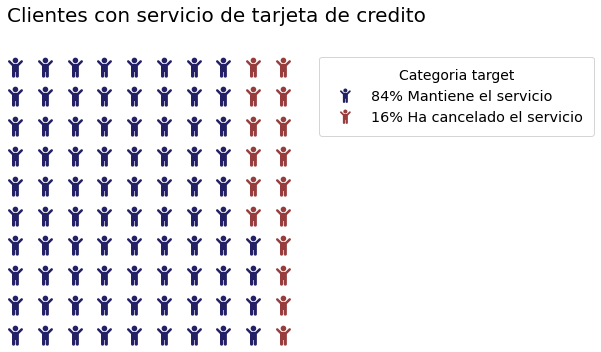

In [ ]:
from pywaffle import Waffle
group_Flag= banco.groupby('Attrition_Flag')['CLIENTNUM'].count()/len(banco) * 100
# Attrited Customer    16.065962
# Existing Customer    83.934038

data = {'84% Mantiene el servicio': group_Flag[1],'16% Ha cancelado el servicio': group_Flag[0]}
fig = plt.figure(
   FigureClass=Waffle, 
    rows=10,
    figsize=(10, 5),
    values=data,
    colors=("#232066", "#983D3D"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.04, 1),'borderpad':0.8,
            'fontsize': 12,'title':'Categoria target','fontsize':'x-large','title_fontsize':14
           },
    icons='child', icon_size=20, 
    icon_legend=True,
    title = {'label': 'Clientes con servicio de tarjeta de credito \n', 'loc': 'left','fontsize': 20}
)

**Interpretación:** 
-Situación preocupante para la empresa (16% de sus clientes inactivos)
-Se necesita un modelo predictivo para poder clasificar a los clientes en categorías o en todo caso un modelo para clasificar en activo e inactivo.


* Realicemos un conteo general. Para ello la siguiente función será util:

In [ ]:
def pltCountplot(cats,data):    
    fig, axis = plt.subplots(len(cats) // 3,3, figsize=(20,12))  
    index = 0
    for i in range(len(cats) // 3):
        for j in range(3):            
            ax = sns.countplot(cats[index], data=data, ax=axis[i][j])            
            if cats[index] in ['Education_Level', 'Income_Category']:
                for item in ax.get_xticklabels():
                    item.set_rotation(15)
                
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                        height + 3,
                        '{:1.2f}%'.format(height/len(data)*100),
                        ha="center") 
            index += 1


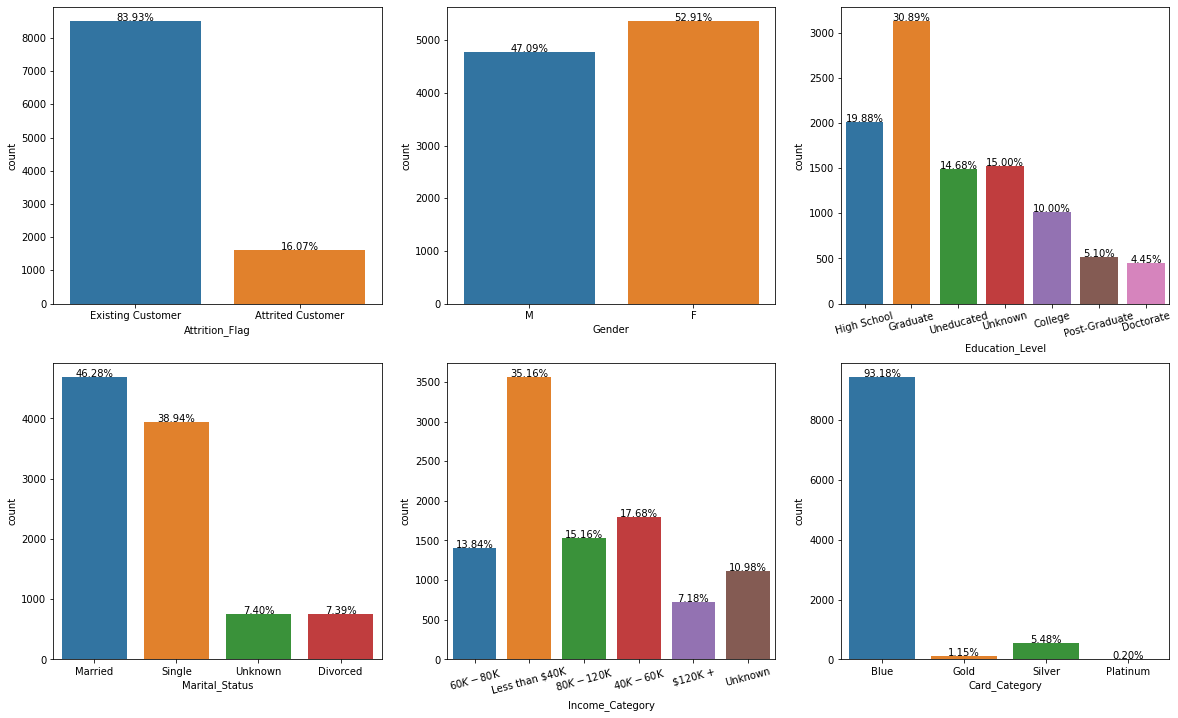

In [ ]:
pltCountplot(varCategoricas,banco)  

**Interpretación:** 
-El 35.6% de clientes ganan menos de 40K al año
-El 93.18% de clientes posee la tarjeta "Azul"

* Observemos las variariables numéricas

In [ ]:
def analisisNumericas(df, variable):
  print(" "*20,"Histograma"," "*20)
  df[variable].plot.hist(bins=25,figsize=(8,4))
  plt.title(f'{variable} \n',fontdict={'fontsize':16})
  plt.show()
  print("\n")
  print(" "*20,"Boxplot"," "*20)
  df[variable].plot.box(figsize=(8,4))
  plt.show()

---------- CLIENTNUM ----------
                     Histograma                     


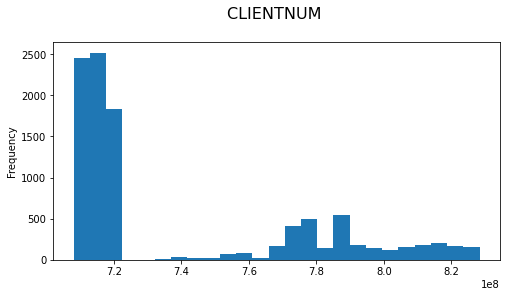



                     Boxplot                     


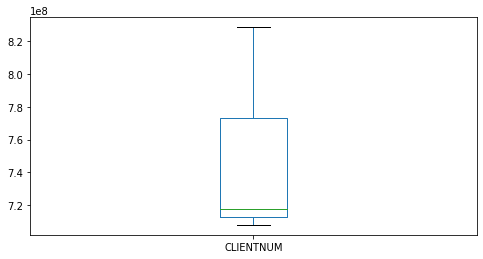



---------- Customer_Age ----------
                     Histograma                     


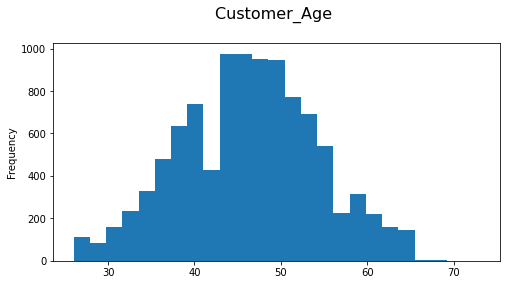



                     Boxplot                     


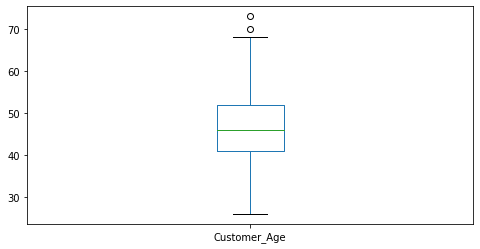



---------- Dependent_count ----------
                     Histograma                     


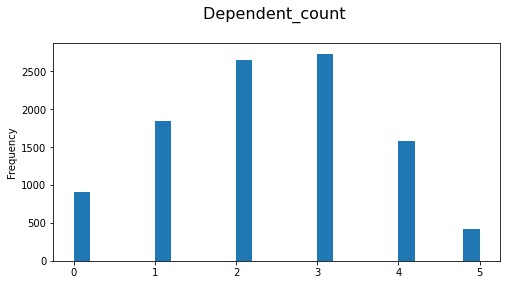



                     Boxplot                     


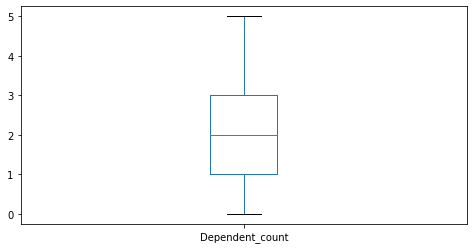



---------- Months_on_book ----------
                     Histograma                     


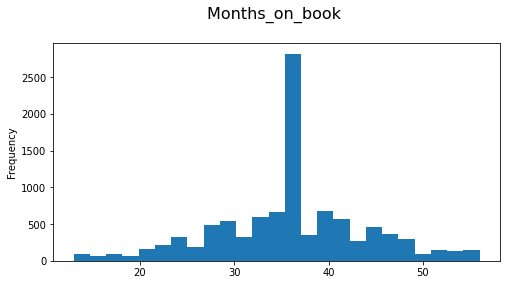



                     Boxplot                     


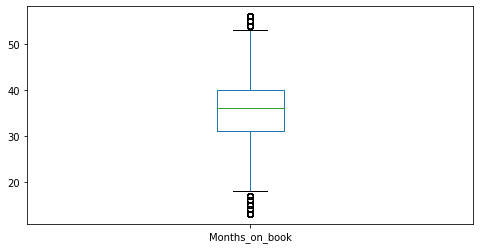



---------- Total_Relationship_Count ----------
                     Histograma                     


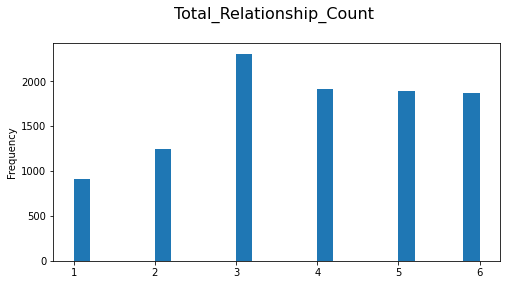



                     Boxplot                     


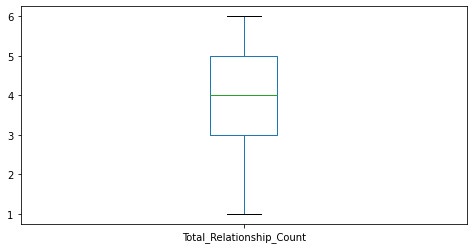



---------- Months_Inactive_12_mon ----------
                     Histograma                     


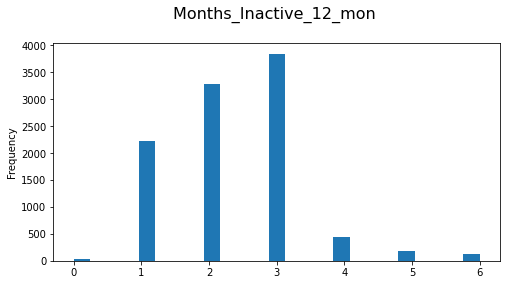



                     Boxplot                     


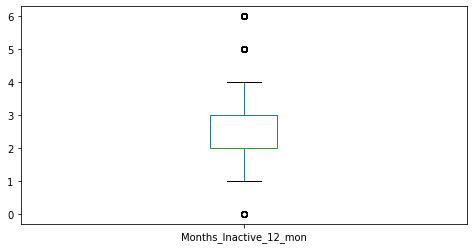



---------- Contacts_Count_12_mon ----------
                     Histograma                     


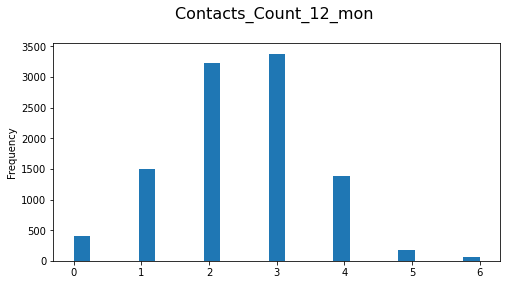



                     Boxplot                     


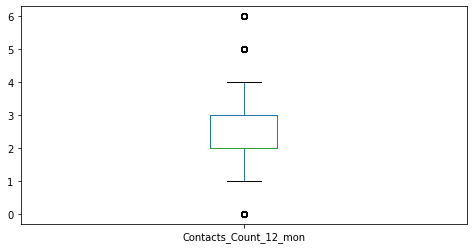



---------- Credit_Limit ----------
                     Histograma                     


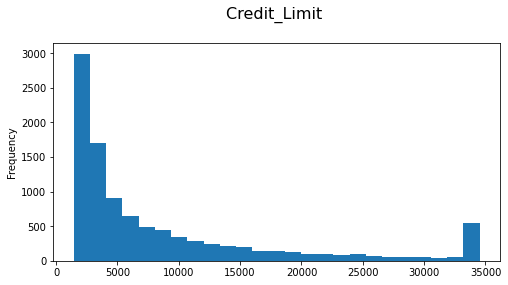



                     Boxplot                     


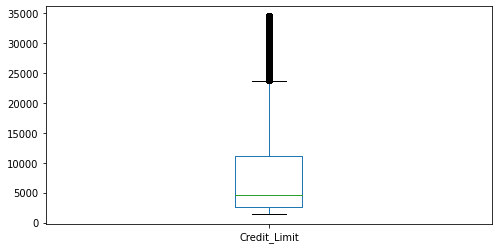



---------- Total_Revolving_Bal ----------
                     Histograma                     


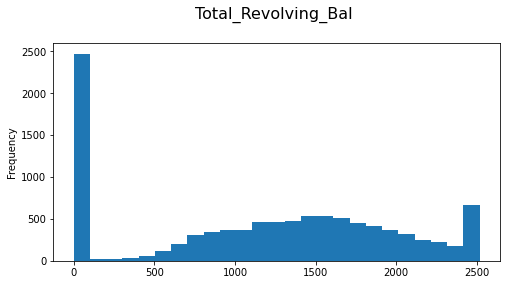



                     Boxplot                     


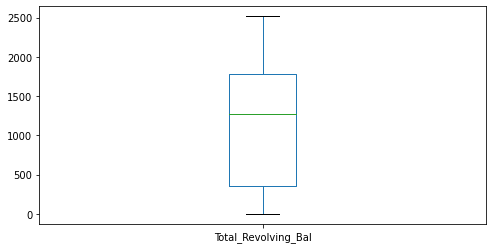



---------- Avg_Open_To_Buy ----------
                     Histograma                     


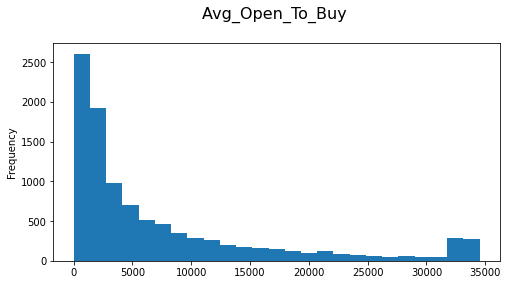



                     Boxplot                     


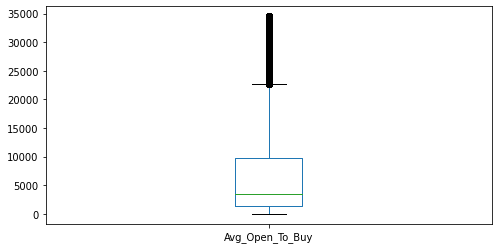



---------- Total_Amt_Chng_Q4_Q1 ----------
                     Histograma                     


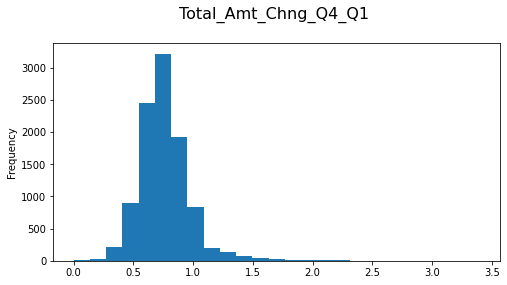



                     Boxplot                     


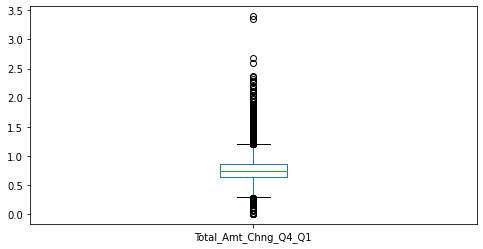



---------- Total_Trans_Amt ----------
                     Histograma                     


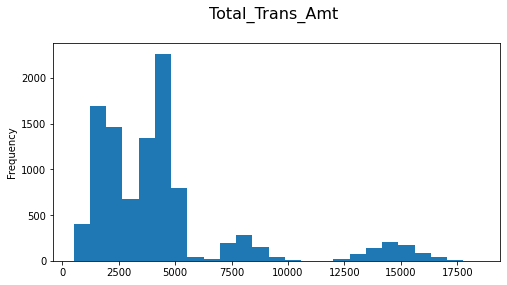



                     Boxplot                     


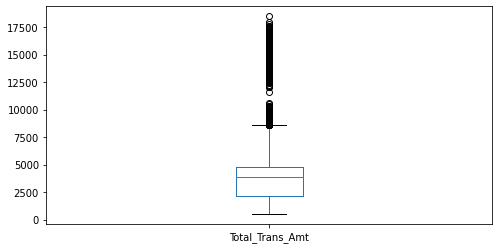



---------- Total_Trans_Ct ----------
                     Histograma                     


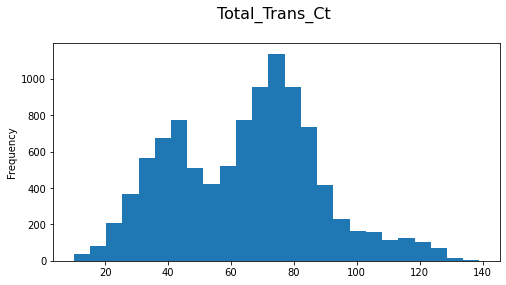



                     Boxplot                     


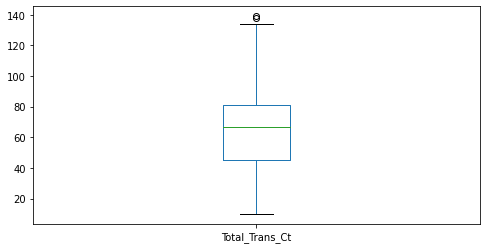



---------- Total_Ct_Chng_Q4_Q1 ----------
                     Histograma                     


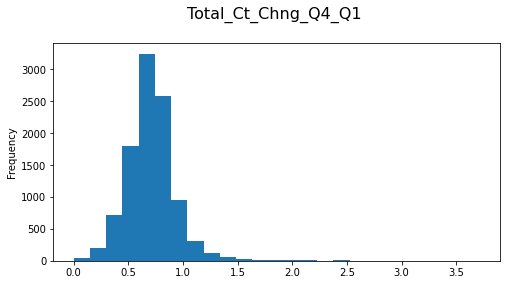



                     Boxplot                     


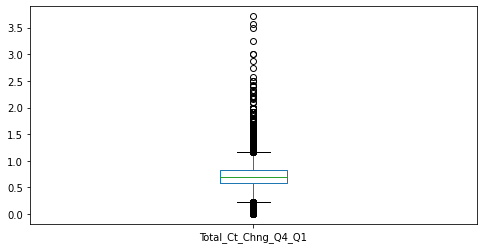



---------- Avg_Utilization_Ratio ----------
                     Histograma                     


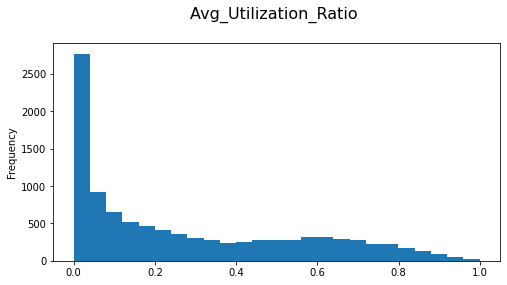



                     Boxplot                     


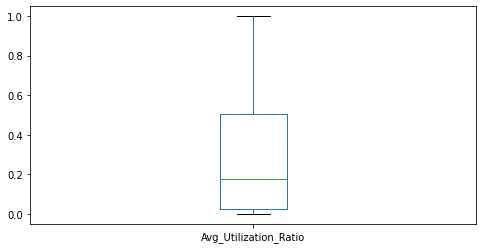

In [ ]:
for var in varNumericas:
  print("-"*10,var,"-"*10)
  analisisNumericas(banco,var)
  print("\n")

**Interpretación**

* Revisemos Variables propias del cliente - Demograficas

In [ ]:

demograficas=pd.concat([banco['Customer_Age'],banco['Gender'],banco['Education_Level'],banco['Marital_Status'],banco['Income_Category'],banco['Attrition_Flag']],axis=1)
demograficas

,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Attrition_Flag
0,45,M,High School,Married,$60K - $80K,Existing Customer
1,49,F,Graduate,Single,Less than $40K,Existing Customer
2,51,M,Graduate,Married,$80K - $120K,Existing Customer
3,40,F,High School,Unknown,Less than $40K,Existing Customer
4,40,M,Uneducated,Married,$60K - $80K,Existing Customer
...,...,...,...,...,...,...
10122,50,M,Graduate,Single,$40K - $60K,Existing Customer
10123,41,M,Unknown,Divorced,$40K - $60K,Attrited Customer
10124,44,F,High School,Married,Less than $40K,Attrited Customer
10125,30,M,Graduate,Unknown,$40K - $60K,Attrited Customer


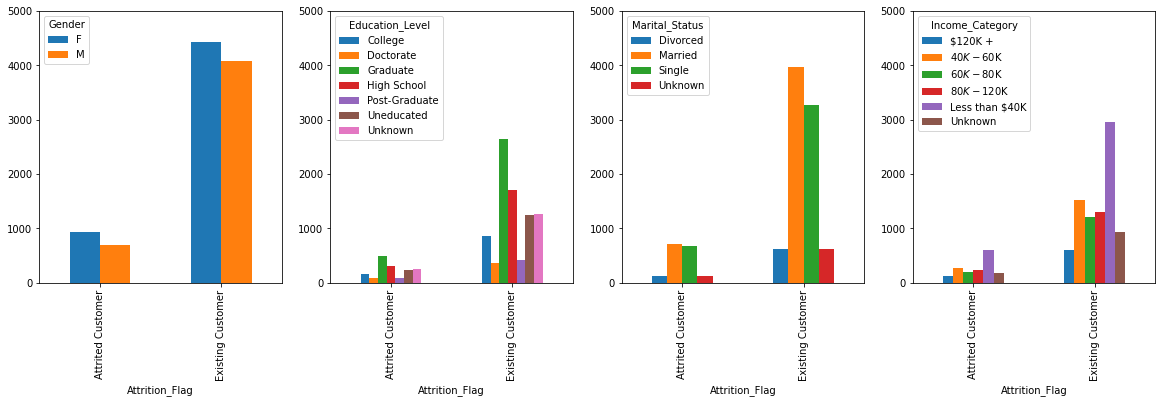

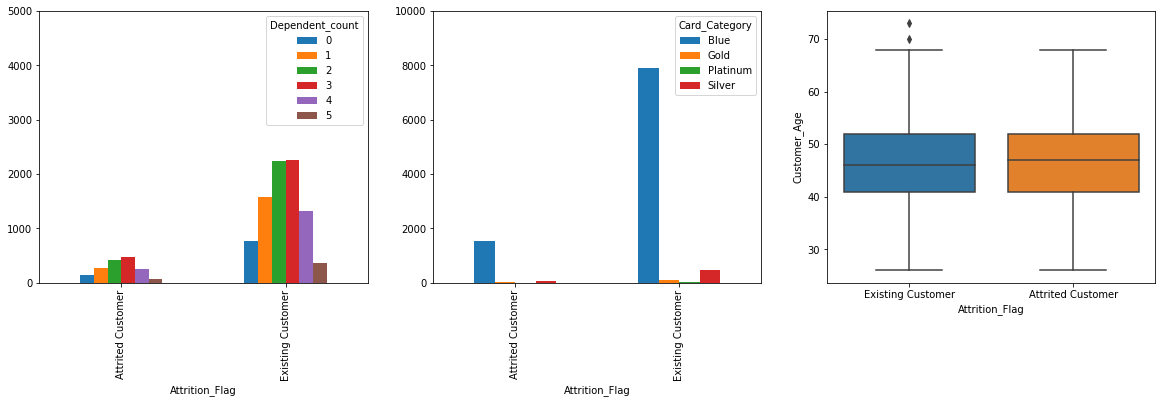

In [ ]:
fig,(ax1, ax2, ax3, ax4)=plt.subplots(ncols=4,figsize=(20,5))
pd.crosstab(demograficas['Attrition_Flag'],demograficas['Gender']).plot(kind='bar',ax=ax1, ylim=[0,5000])
pd.crosstab(demograficas['Attrition_Flag'],demograficas['Education_Level']).plot(kind='bar',ax=ax2, ylim=[0,5000])
pd.crosstab(demograficas['Attrition_Flag'],demograficas['Marital_Status']).plot(kind='bar',ax=ax3, ylim=[0,5000])
pd.crosstab(demograficas['Attrition_Flag'],demograficas['Income_Category']).plot(kind='bar',ax=ax4, ylim=[0,5000])

fig,(ax, ax2, ax3)=plt.subplots(ncols=3,figsize=(20,5))
pd.crosstab(demograficas['Attrition_Flag'],banco['Dependent_count']).plot(kind='bar',ax=ax, ylim=[0,5000])
pd.crosstab(demograficas['Attrition_Flag'],banco['Card_Category']).plot(kind='bar',ax=ax2, ylim=[0,10000])
sns.boxplot(data = demograficas,x='Attrition_Flag',y='Customer_Age', ax=ax3)

In [ ]:
#Hacer boxplot de las demás
sns.boxplot(data = demograficas,x='Attrition_Flag',y='Customer_Age', ax=ax3)

**Interpretación**

* Revisemos las variables totales

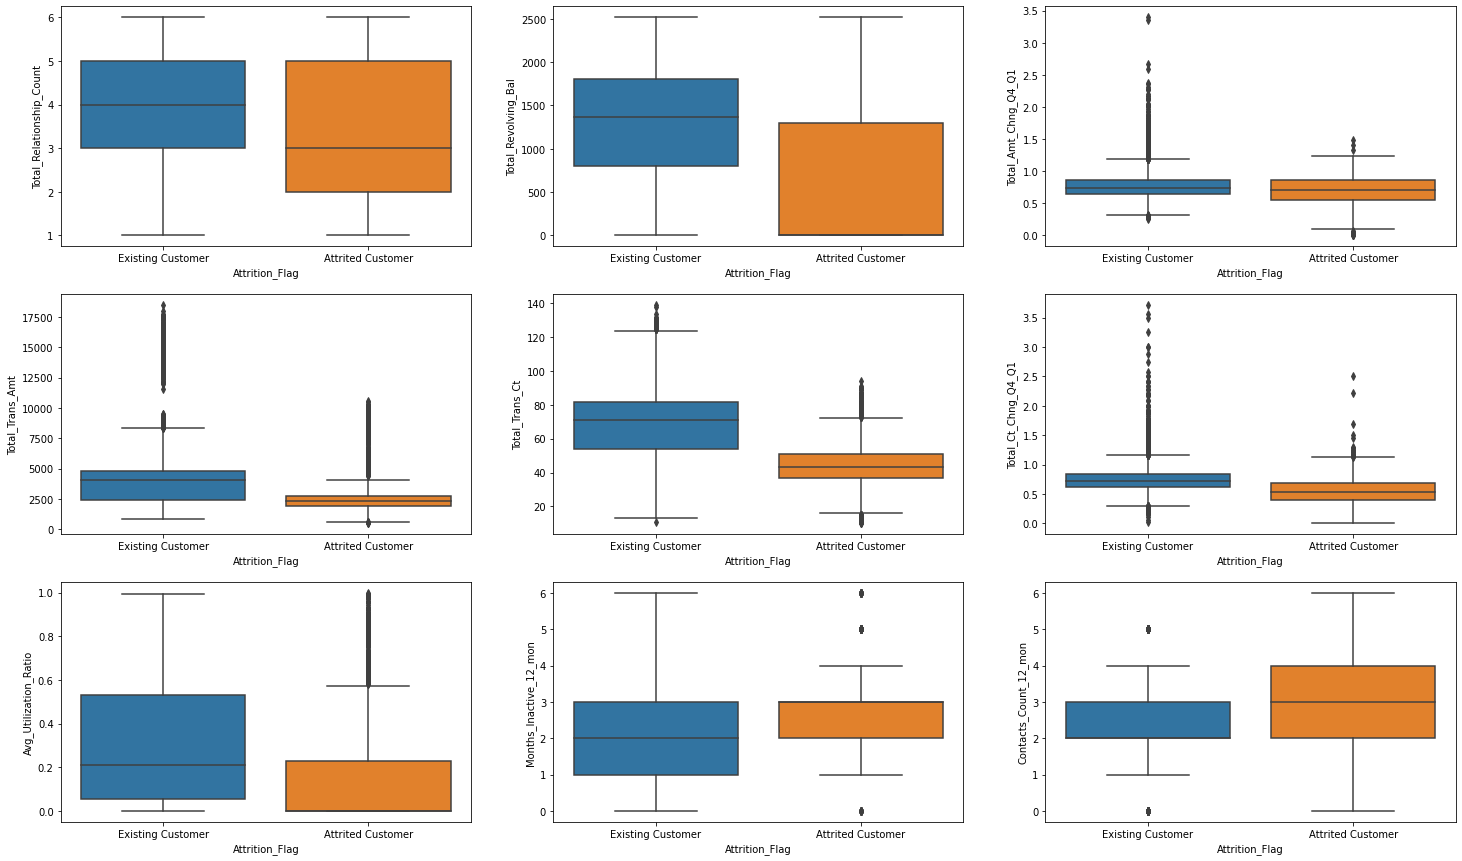

In [ ]:
f, axes = plt.subplots(nrows=3, ncols=3, figsize=(25,15))

sns.boxplot(x="Attrition_Flag", y="Total_Relationship_Count", data=banco, ax=axes[0,0])
sns.boxplot(x="Attrition_Flag", y="Total_Revolving_Bal", data=banco, ax=axes[0,1])
sns.boxplot(x="Attrition_Flag", y="Total_Amt_Chng_Q4_Q1", data=banco, ax=axes[0,2])
sns.boxplot(x="Attrition_Flag", y="Total_Trans_Amt", data=banco, ax=axes[1,0])
sns.boxplot(x="Attrition_Flag", y="Total_Trans_Ct", data=banco, ax=axes[1,1])
sns.boxplot(x="Attrition_Flag", y="Total_Ct_Chng_Q4_Q1", data=banco, ax=axes[1,2])
sns.boxplot(x="Attrition_Flag", y="Avg_Utilization_Ratio", data=banco, ax=axes[2,0])
sns.boxplot(x="Attrition_Flag", y="Months_Inactive_12_mon", data=banco, ax=axes[2,1])
sns.boxplot(x="Attrition_Flag", y="Contacts_Count_12_mon", data=banco, ax=axes[2,2])

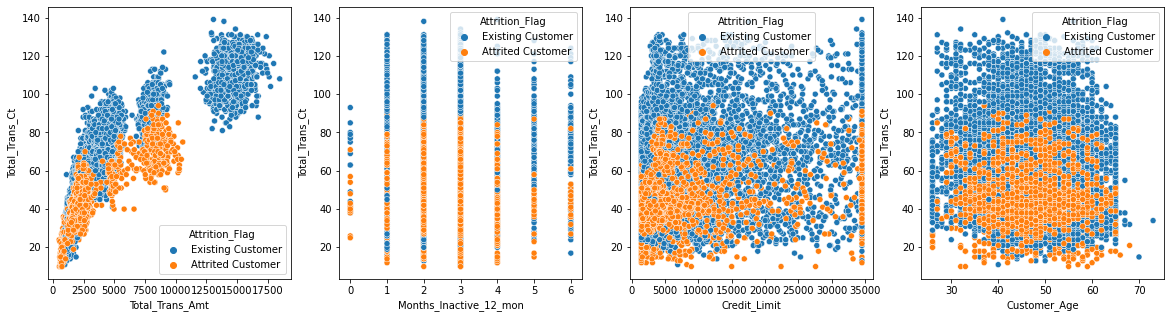

In [ ]:
df_frequency=pd.concat([banco['Customer_Age'],banco['Total_Trans_Ct'],banco['Total_Trans_Amt'],banco['Months_Inactive_12_mon'],banco['Credit_Limit'],banco['Attrition_Flag']],axis=1)

fig,ax=plt.subplots(ncols=4,figsize=(20,5))
sns.scatterplot(data=df_frequency,y="Total_Trans_Ct",x="Total_Trans_Amt",hue="Attrition_Flag",ax=ax[0])
sns.scatterplot(data=df_frequency,y="Total_Trans_Ct",x="Months_Inactive_12_mon",hue="Attrition_Flag",ax=ax[1])
sns.scatterplot(data=df_frequency,y="Total_Trans_Ct",x="Credit_Limit",hue="Attrition_Flag",ax=ax[2])
sns.scatterplot(data=df_frequency,y="Total_Trans_Ct",x="Customer_Age",hue="Attrition_Flag",ax=ax[3])

**Interpretación**

De estos gráficos se puede señalar que:
1. Cuanto mayor sea el gasto anual, es más probable que los clientes se queden.
2. Después de los 2 meses de inactividad, los clientes son más propensos a marcharse.
3. Cuanto más alto sea el límite de crédito, es más probable que los clientes permanezcan.
4. La distribución de la edad no importa realmente en este caso, porque los grupos se superponen en gran medida.
5. Casi todos los clientes que se dan de baja han utilizado sus tarjetas menos de 100 veces.

**Análisis de Correlacion**

Como dentro de nuestra base de datos poseemos datos con caracteristicas mixtas: categóricas y numéricas, no bastara unicamente utilizar simplemente la funcion de correlación estandar. Lo que se realizara es la division de caracteristicas en tablas separadas una para las numericas (Pearson) y otra para las categoricas (V de Cramer).


**TAREA**
* INVESTIGAR EL ANÁLISIS DE CORRELACIÓN PARA VARIABLES CATEGÓRICAS Y NÚMERICAS
Observar SI existe alguna correlacion entre las variables categoricas y la variable objetivo. Lo mismo con las variables numericas. Identificar que variables pueden ser descatadas por tener un valor de correlación bajo

In [ ]:
#Correlacion entre variables Categoricas#
df_categorical=banco.loc[:,banco.dtypes==np.object]
df_categorical = df_categorical[['Gender', 'Education_Level', 'Marital_Status', 'Income_Category','Card_Category','Attrition_Flag']]
df_categorical.head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
0,M,High School,Married,$60K - $80K,Blue,Existing Customer
1,F,Graduate,Single,Less than $40K,Blue,Existing Customer
2,M,Graduate,Married,$80K - $120K,Blue,Existing Customer
3,F,High School,Unknown,Less than $40K,Blue,Existing Customer
4,M,Uneducated,Married,$60K - $80K,Blue,Existing Customer


In [ ]:
df_numerical=banco.loc[:,banco.dtypes!=np.object]
df_numerical['Attrition_Flag']=banco.loc[:,'Attrition_Flag']
oh=pd.get_dummies(df_numerical['Attrition_Flag'])
df_numerical=df_numerical.drop(['Attrition_Flag'],axis=1)
df_numerical=df_numerical.drop(['CLIENTNUM'],axis=1)
df_numerical=df_numerical.join(oh)
df_numerical.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrited Customer,Existing Customer
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,1
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,1
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,1
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,1
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,1


In [ ]:
df_categorical=pd.get_dummies(df_categorical)
df_categorical.corr('pearson')

,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Attrition_Flag_Attrited Customer,Attrition_Flag_Existing Customer
Gender_F,1.000000,-1.000000,-0.002610,0.017631,0.006438,-0.018361,-0.009001,0.005174,4.613132e-03,0.004726,-0.011427,0.015756,-0.012307,-0.294775,0.034718,-0.424892,-0.448017,0.580016,0.298443,0.085200,-0.043453,-7.047580e-03,-0.072699,0.037272,-0.037272
Gender_M,-1.000000,1.000000,0.002610,-0.017631,-0.006438,0.018361,0.009001,-0.005174,-4.613132e-03,-0.004726,0.011427,-0.015756,0.012307,0.294775,-0.034718,0.424892,0.448017,-0.580016,-0.298443,-0.085200,0.043453,7.047580e-03,0.072699,-0.037272,0.037272
Education_Level_College,-0.002610,0.002610,1.000000,-0.071976,-0.222877,-0.166056,-0.077249,-0.138308,-1.400483e-01,0.014065,-0.001214,-0.005681,-0.001160,-0.003470,0.003405,-0.007854,0.019690,-0.007724,-0.003403,-0.005064,0.010505,-1.483044e-02,0.003591,-0.007840,0.007840
Education_Level_Doctorate,0.017631,-0.017631,-0.071976,1.000000,-0.144330,-0.107534,-0.050024,-0.089565,-9.069182e-02,0.004920,-0.003584,0.006284,-0.009797,0.008574,-0.012193,-0.004764,-0.015165,-0.000589,0.031354,0.003367,-0.000747,1.196113e-02,-0.005714,0.029386,-0.029386
Education_Level_Graduate,0.006438,-0.006438,-0.222877,-0.144330,1.000000,-0.332981,-0.154902,-0.277341,-2.808298e-01,-0.004936,0.013413,-0.009162,-0.003552,-0.017017,0.000061,-0.006836,0.002308,0.017496,-0.007842,-0.013194,0.000342,8.773241e-03,0.012746,-0.009046,0.009046
Education_Level_High School,-0.018361,0.018361,-0.166056,-0.107534,-0.332981,1.000000,-0.115410,-0.206635,-2.092339e-01,-0.019568,0.008604,-0.000899,0.004838,0.002387,-0.000524,0.020287,0.001987,-0.019091,0.003135,0.012123,0.006841,-1.658353e-02,-0.013394,-0.011730,0.011730
Education_Level_Post-Graduate,-0.009001,0.009001,-0.077249,-0.050024,-0.154902,-0.115410,1.000000,-0.096126,-9.733484e-02,0.004957,0.003768,-0.010966,0.008298,-0.012251,0.023301,0.007234,0.003490,-0.010762,-0.013874,-0.008533,-0.003842,2.003629e-02,0.007342,0.011127,-0.011127
Education_Level_Uneducated,0.005174,-0.005174,-0.138308,-0.089565,-0.277341,-0.206635,-0.096126,1.000000,-1.742715e-01,0.027912,-0.018026,0.004022,-0.001044,0.013240,-0.010118,-0.008775,-0.006529,-0.000514,0.019381,0.006045,-0.015817,3.977586e-04,0.000621,-0.001444,0.001444
Education_Level_Unknown,0.004613,-0.004613,-0.140048,-0.090692,-0.280830,-0.209234,-0.097335,-0.174272,1.000000e+00,-0.017125,-0.008334,0.016771,0.001747,0.011735,0.000369,-0.000235,-0.008670,0.012665,-0.019278,0.005096,0.001561,6.150973e-07,-0.006376,0.009005,-0.009005
Marital_Status_Divorced,0.004726,-0.004726,0.014065,0.004920,-0.004936,-0.019568,0.004957,0.027912,-1.712528e-02,1.000000,-0.262132,-0.225502,-0.079810,-0.002483,0.005728,0.004860,-0.010926,-0.007134,0.013121,-0.001440,-0.012659,-4.058463e-03,0.008305,0.000850,-0.000850


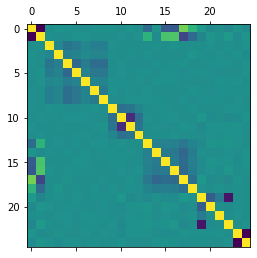

In [ ]:
plt.matshow(df_categorical.corr('pearson'))

In [ ]:
df_numerical.corr('pearson')

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrited Customer,Existing Customer
Customer_Age,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114,0.018203,-0.018203
Dependent_count,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135,0.018991,-0.018991
Months_on_book,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541,0.013687,-0.013687
Total_Relationship_Count,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663,-0.150005,0.150005
Months_Inactive_12_mon,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503,0.152449,-0.152449
Contacts_Count_12_mon,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471,0.204491,-0.204491
Credit_Limit,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965,-0.023873,0.023873
Total_Revolving_Bal,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022,-0.263053,0.263053
Avg_Open_To_Buy,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808,-0.000285,0.000285
Total_Amt_Chng_Q4_Q1,-0.062042,-0.035439,-0.048959,0.050119,-0.032247,-0.024445,0.012813,0.058174,0.007595,1.000000,0.039678,0.005469,0.384189,0.035235,-0.131063,0.131063


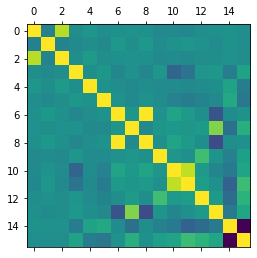

In [ ]:
plt.matshow(df_numerical.corr('pearson'))